In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Step 1: Load Data
file_path = "/content/reshaped_data.csv"
df = pd.read_csv(file_path)

# Step 2: Clean column names
df.columns = df.columns.str.strip()

# Step 3: Identify Data Categories (Based on "Series Name")
percentage_rows = df["Series Name"].str.contains("% of GDP|%|annual %", case=False, na=False)
currency_rows = df["Series Name"].str.contains("US\$|Dollar|Euro|PPP|Currency", case=False, na=False)
absolute_rows = ~percentage_rows & ~currency_rows  # Everything else

# Step 4: Convert "Value" to Numeric
df["Value"] = pd.to_numeric(df["Value"], errors="coerce")

# Step 5: Handle Missing Values
df.loc[percentage_rows, "Value"] = df.loc[percentage_rows, "Value"].fillna(df.loc[percentage_rows, "Value"].median())
df.loc[currency_rows, "Value"] = df.loc[currency_rows, "Value"].fillna(method='ffill')
df.loc[absolute_rows, "Value"] = df.loc[absolute_rows, "Value"].interpolate()

df["Country Name"].fillna("Unknown", inplace=True)
df["Country Code"].fillna("XXX", inplace=True)
df["Series Name"].fillna("Unknown Series", inplace=True)
df["Series Code"].fillna("Unknown Code", inplace=True)

# Step 6: Standardize Values Based on Type
scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

df["Value_Standardized"] = df["Value"]  # Copy original values for standardization

# Normalize each type of data differently
df.loc[percentage_rows, "Value_Standardized"] = minmax_scaler.fit_transform(df.loc[percentage_rows, ["Value"]])
df.loc[currency_rows, "Value_Standardized"] = np.log1p(df.loc[currency_rows, "Value"])  # Log transformation for currency
df.loc[absolute_rows, "Value_Standardized"] = scaler.fit_transform(df.loc[absolute_rows, ["Value"]])  # Z-score

# Step 7: Encode Categorical Variables
label_encoder = LabelEncoder()
df["Country Code Encoded"] = label_encoder.fit_transform(df["Country Code"])
df["Series Code Encoded"] = label_encoder.fit_transform(df["Series Code"])

# Step 8: Save Cleaned Dataset
output_path = "/content/Cleaned_Standardized_Data.csv"
df.to_csv(output_path, index=False)
print(f"Cleaned dataset saved to: {output_path}")

# Step 9: Exploratory Data Analysis
print("\n Descriptive Statistics:")
print(df.describe())




<ipython-input-1-f4b669516c05>:24: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.loc[currency_rows, "Value"] = df.loc[currency_rows, "Value"].fillna(method='ffill')
<ipython-input-1-f4b669516c05>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Country Name"].fillna("Unknown", inplace=True)
<ipython-input-1-f4b669516c05>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment usi

Cleaned dataset saved to: /content/Cleaned_Standardized_Data.csv

 Descriptive Statistics:
              Year         Value  Value_Standardized  Country Code Encoded  \
count  134190.0000  1.341900e+05       131988.000000         134190.000000   
mean     2022.0000  1.579525e+13            1.958623            132.411402   
std         0.8165  8.787049e+14            6.243739             76.771287   
min      2021.0000 -5.403950e+15           -3.897932              0.000000   
25%      2021.0000  2.427682e+00           -0.021773             66.000000   
50%      2022.0000  1.074200e+01            0.006977            133.000000   
75%      2023.0000  6.376481e+01            0.007617            199.000000   
max      2023.0000  1.430393e+17          102.577795            266.000000   

       Series Code Encoded  
count        134190.000000  
mean            103.209032  
std              53.388131  
min               0.000000  
25%              64.000000  
50%             106.000000  
75%

In [ ]:
import pandas as pd

# Step 1: Load the dataset
file_path = "/content/Cleaned_Standardized_Data.csv"  # Change this to your file path
df = pd.read_csv(file_path)

# Step 2: Check for missing values
print("\n Missing Values Before Dropping:")
print(df.isnull().sum())

# Step 3: Drop rows where any column has missing values
df_cleaned = df.dropna()

# Step 4: Verify if all missing values are removed
print("\n Missing Values After Dropping:")
print(df_cleaned.isnull().sum())

# Step 5: Save the cleaned dataset
output_path = "/content/Cleaned_No_Missing_Values.csv"
df_cleaned.to_csv(output_path, index=False)

print(f"\n Cleaned dataset saved to: {output_path}")



 Missing Values Before Dropping:
Country Name               0
Country Code               0
Series Name                0
Series Code                0
Year                       0
Value                      0
Value_Standardized      2202
Country Code Encoded       0
Series Code Encoded        0
dtype: int64

 Missing Values After Dropping:
Country Name            0
Country Code            0
Series Name             0
Series Code             0
Year                    0
Value                   0
Value_Standardized      0
Country Code Encoded    0
Series Code Encoded     0
dtype: int64

 Cleaned dataset saved to: /content/Cleaned_No_Missing_Values.csv



 Descriptive Statistics:
                Year         Value  Value_Standardized  Country Code Encoded  \
count  131988.000000  1.319880e+05       131988.000000         131988.000000   
mean     2021.999636  1.605899e+13            1.958623            132.383005   
std         0.816685  8.860021e+14            6.243739             76.777467   
min      2021.000000 -5.403950e+15           -3.897932              0.000000   
25%      2021.000000  3.267717e+00           -0.021773             66.000000   
50%      2022.000000  1.074200e+01            0.006977            133.000000   
75%      2023.000000  6.625936e+01            0.007617            199.000000   
max      2023.000000  1.430393e+17          102.577795            266.000000   

       Series Code Encoded  
count        131988.000000  
mean            104.496280  
std              52.686765  
min               0.000000  
25%              65.000000  
50%             107.000000  
75%             149.000000  
max             194.0

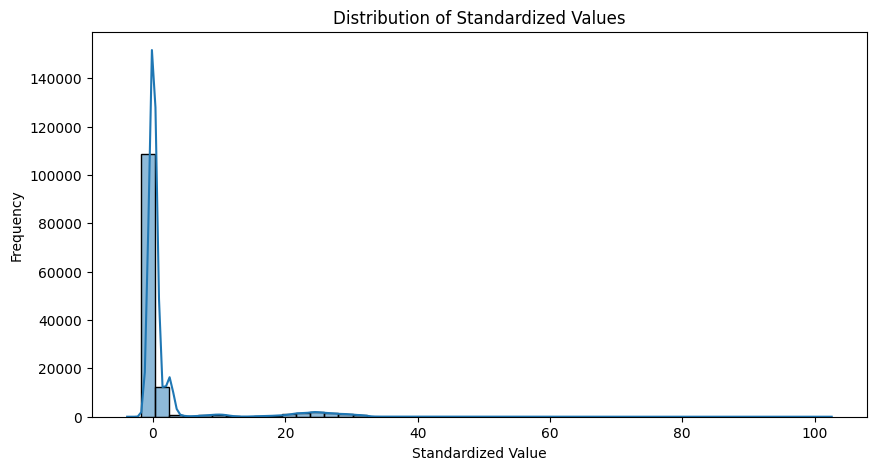

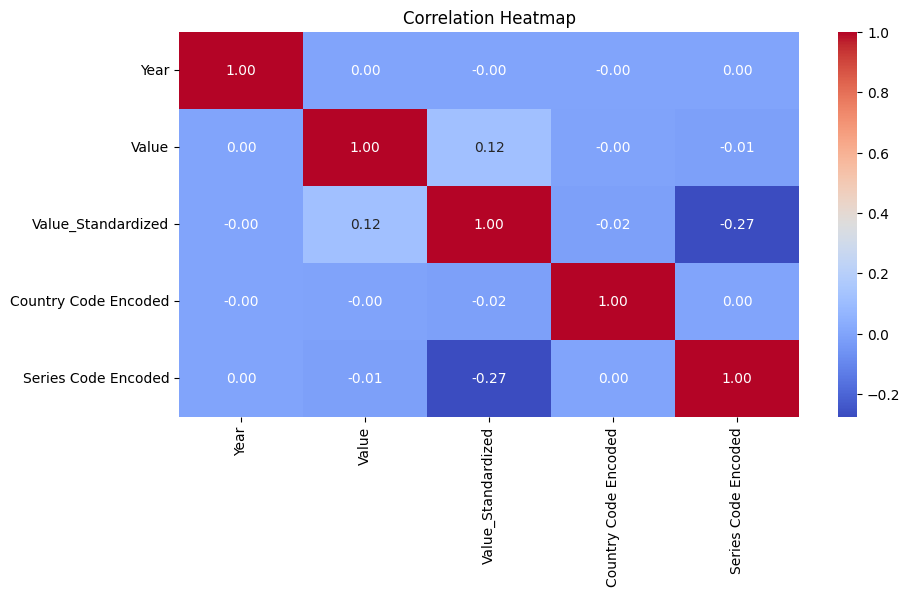

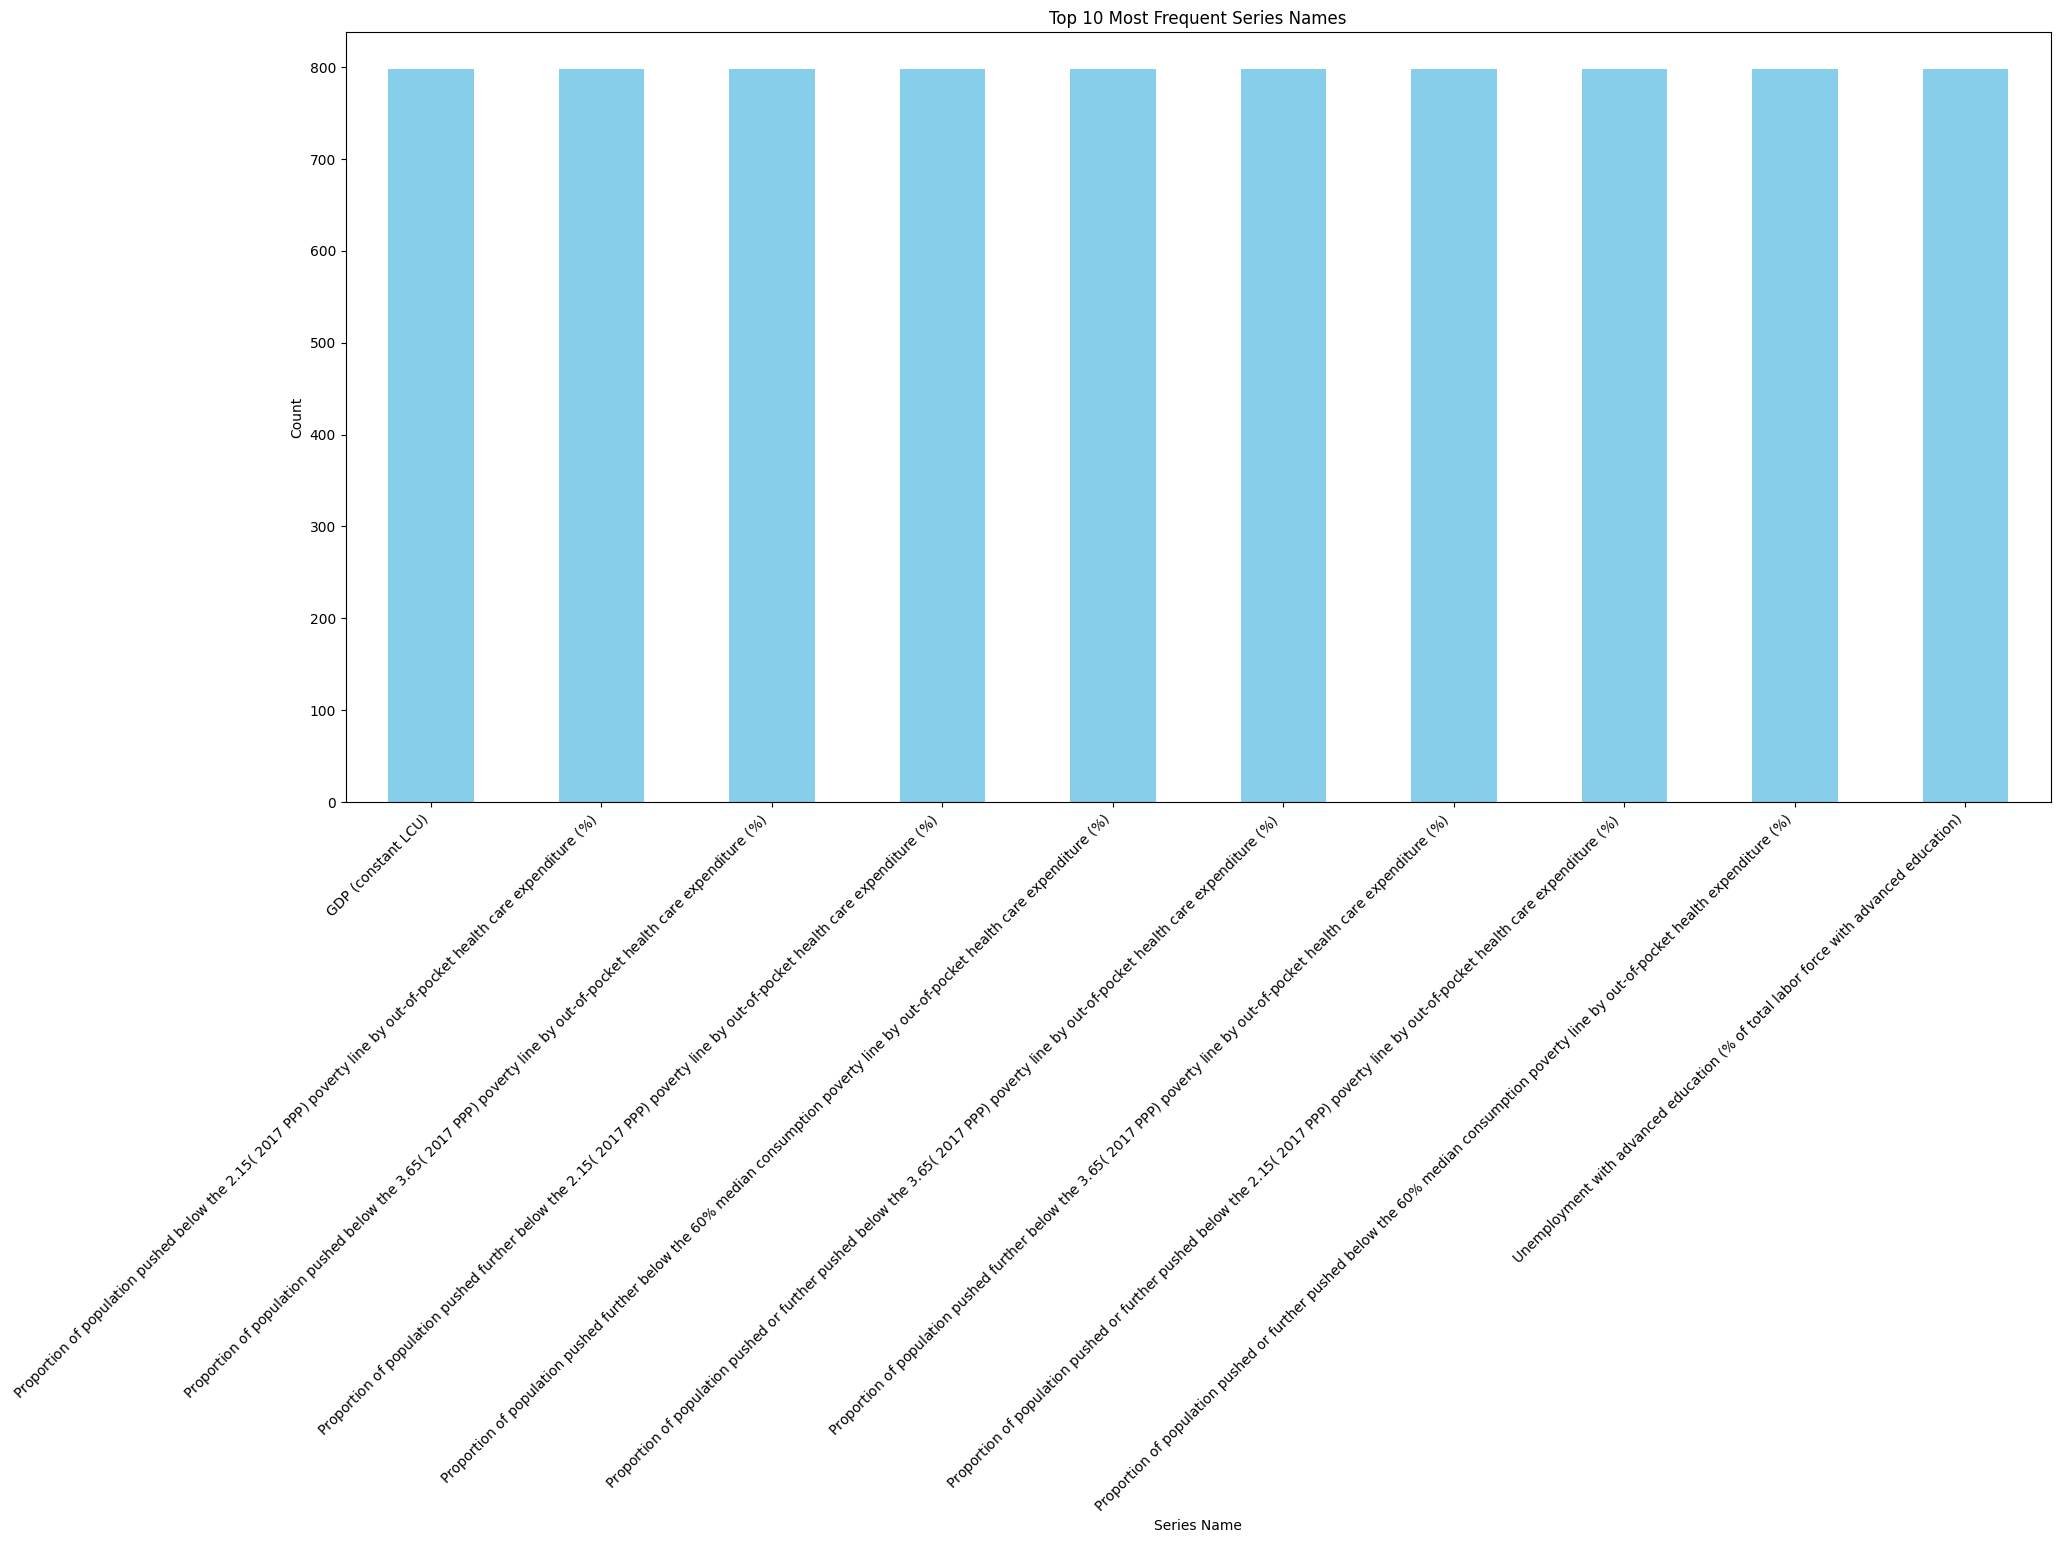

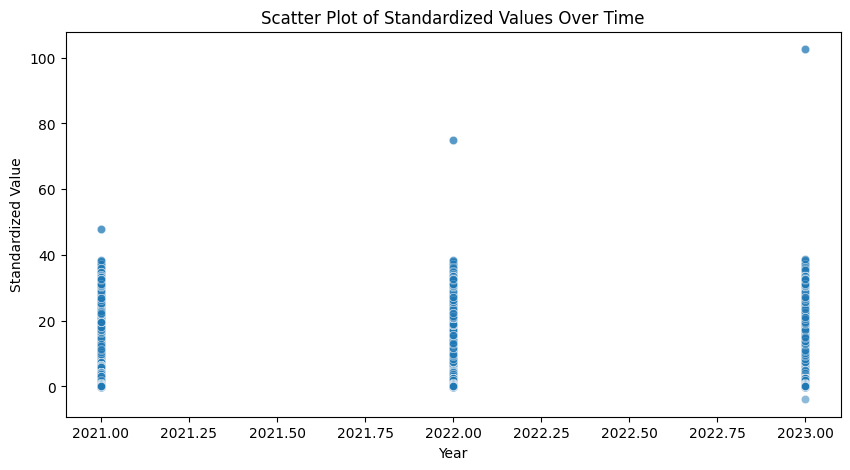

In [ ]:
# Step 1: Load the cleaned dataset
file_path = "/content/Cleaned_No_Missing_Values.csv"
df = pd.read_csv(file_path)

# Step 2: Generate Descriptive Statistics
print("\n Descriptive Statistics:")
print(df.describe())

# Step 3: Histogram of Standardized Values
plt.figure(figsize=(10, 5))
sns.histplot(df["Value_Standardized"], bins=50, kde=True)
plt.title("Distribution of Standardized Values")
plt.xlabel("Standardized Value")
plt.ylabel("Frequency")
plt.show()

# Step 4: Correlation Heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Step 5: Top 10 Most Frequent Series Names (Bar Plot)
plt.figure(figsize=(22, 10))
df["Series Name"].value_counts().nlargest(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Frequent Series Names")
plt.xlabel("Series Name")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()

# Step 6: Scatter Plot (Standardized Value vs Year)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Year"], y=df["Value_Standardized"], alpha=0.5)
plt.title("Scatter Plot of Standardized Values Over Time")
plt.xlabel("Year")
plt.ylabel("Standardized Value")
plt.show()
